In [12]:
debug = False

In [2]:
from PIL import Image
import numpy as np

In [3]:
from pprint import pprint
from ipywidgets import widgets
from ipywidgets.widgets import interact
from IPython.display import display

In [4]:
import matplotlib.image as mpimg

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [6]:
%matplotlib notebook

# Select working data set

In [7]:
%gui qt

In [8]:
from PyQt4 import QtCore, QtGui

def gui_fname(dir=None):
    """Select a file via a dialog and returns the file name."""
    if dir is None: dir ='./'
    fname = QtGui.QFileDialog.getOpenFileNames(None, "Select file...", 
                                            dir, 
                                            filter = "TIF (*.tif);; All files (*)")
    return fname

In [9]:
# Default folder
default_dir = '/Volumes/Macintosh HD 2/IPTS/TOF_Si_powder'

In [10]:
%gui qt
list_fname = gui_fname(dir = default_dir)

Make sure files are sorted the right way !

In [13]:
if debug:
    pprint(list_fname)
    print()
    pprint("Loaded %d files" %(len(list_fname)))

Load images

In [14]:
nbr_images = len(list_fname)
images = []

w = widgets.IntProgress()
w.max = nbr_images
display(w)

for _index in range(nbr_images):
        
        _file = list_fname[_index]
#        _image = mpimg.imread(_file)
        _image = Image.open(_file)
        _image = np.asarray(_image)
        images.append(_image)

        w.value = _index
    

# Normalize images
Using average number of counts from OB ROI / images and divide each pixel of images by normalized coefficient

## OB is part of the image

        b. calculate average counts
        c. divide each pixel of sample by OB avereage value

### a. Select region of the image that is OB and sample

<IPython.core.display.Javascript object>


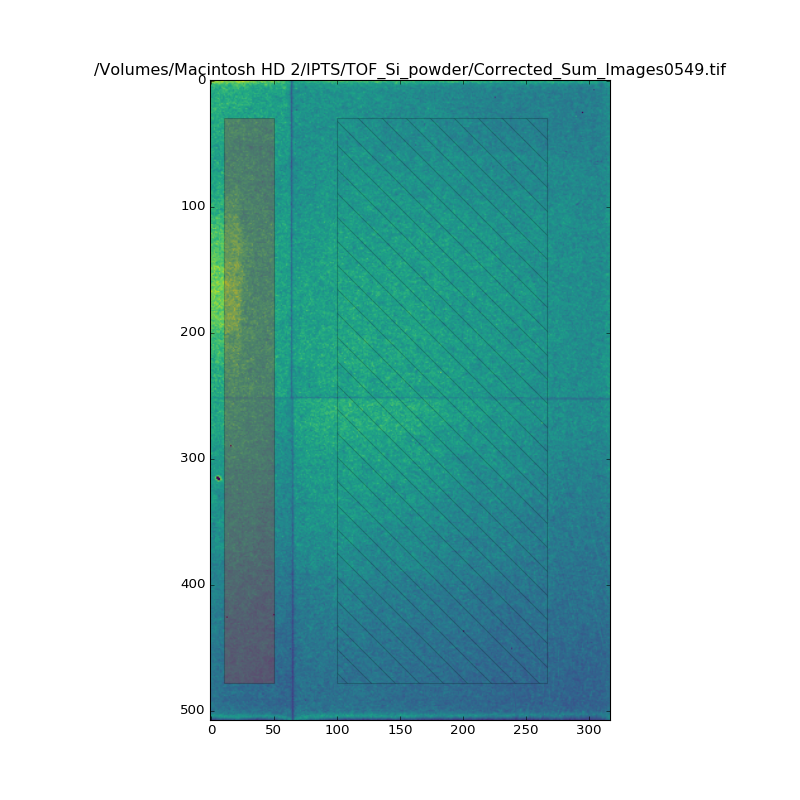

[[10, 50, 30, 478], [100, 267, 30, 478]]

In [15]:
[height, width] = images[0].shape
    
# select Sample region
def plot_images_to_select_ob_sample_regions(file_index, 
                                        ob_left, ob_right, ob_top, ob_bottom,
                                        s_left, s_right, s_top, s_bottom):

    _data = images[file_index]

    fig1 = plt.figure(figsize=(10, 10))
    ax_img = plt.subplot(111)

    ax_img.imshow(_data, cmap='viridis')
    ax_img.set_title(list_fname[file_index])

    ax_img.add_patch(Rectangle((ob_left, ob_bottom), (ob_right-ob_left), (ob_top-ob_bottom), 
                               fill=True, 
#                               hatch='\\',,
                               alpha=0.2,
                              facecolor='red'))

    ax_img.add_patch(Rectangle((s_left, s_bottom), (s_right - s_left), (s_top - s_bottom), 
                              fill = False,
                               hatch = '\\',
                              alpha = 0.2,
                              facecolor = 'blue'))

    return [[ob_left, ob_right, ob_top, ob_bottom], [s_left, s_right, s_top, s_bottom]]


crop = interact(plot_images_to_select_ob_sample_regions,
               file_index = widgets.IntSlider(min=0, max=nbr_images, step=1, value=10, description='Image Index'),

            ob_left = widgets.IntSlider(min=0, max=width, step=1, value=10, description='left OB'),
           ob_right = widgets.IntSlider(min=0, max=width, step=1, value=50, description='right OB'),
           ob_top = widgets.IntSlider(min=0, max=height, step=1, value=30, description='top OB'),
           ob_bottom = widgets.IntSlider(min=0, max=height, step=1, value=height-30, description='bottom OB'),

            s_left = widgets.IntSlider(min=0, max=width, step=1, value=100, description='left sample'),
           s_right = widgets.IntSlider(min=0, max=width, step=1, value=width-50, description='right sample'),
           s_top = widgets.IntSlider(min=0, max=height, step=1, value=30, description='top sample'),
           s_bottom = widgets.IntSlider(min=0, max=height, step=1, value=height-30, description='bottom sample')) 


In [16]:
[ob_selection, s_selection] = crop.widget.result
print("Region selected:")
print()
print("-> Open Beam: ")
print("      left: %d" %ob_selection[0])
print("     right: %d" %ob_selection[1])
print("       top: %d" %ob_selection[2])
print("    bottom: %d" %ob_selection[3])
print()
print("-> Sample: ")
print("      left: %d" %s_selection[0])
print("     right: %d" %s_selection[1])
print("       top: %d" %s_selection[2])
print("    bottom: %d" %s_selection[3])


Region selected:

-> Open Beam: 
      left: 10
     right: 50
       top: 30
    bottom: 478

-> Sample: 
      left: 100
     right: 267
       top: 30
    bottom: 478


### b. Calculate average counts in OB region (for each image) 

In [17]:
[ob_left, ob_right, ob_top, ob_bottom] = ob_selection

In [18]:
ob_average_counts = []
for _index in range(nbr_images):
    
    _data = images[_index]
    
    #region selected
    _ob = _data[ob_top: ob_bottom, ob_left: ob_right]
    _mean_value = np.mean(_ob)
    
    ob_average_counts.append(_mean_value)

<IPython.core.display.Javascript object>


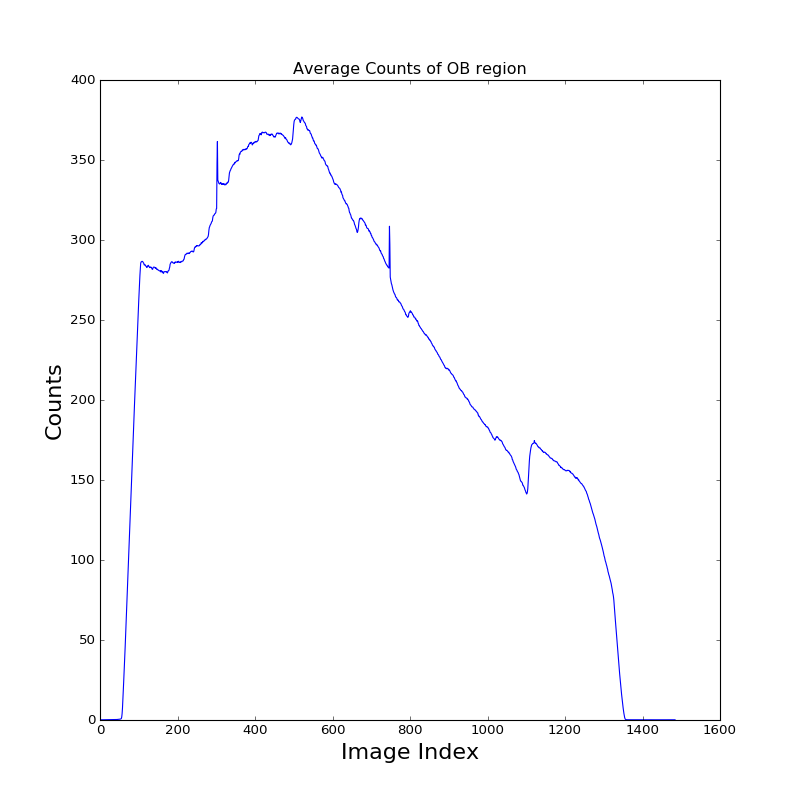

In [19]:
# display to check values
fig2 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(range(nbr_images), ob_average_counts)

ax_img.set_xlabel("Image Index", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_title("Average Counts of OB region")



### c. Crop images to keep only sample region

#### 1. Keep only the range of images of interest (if needed)

In [20]:
%matplotlib inline

[100, 1311]

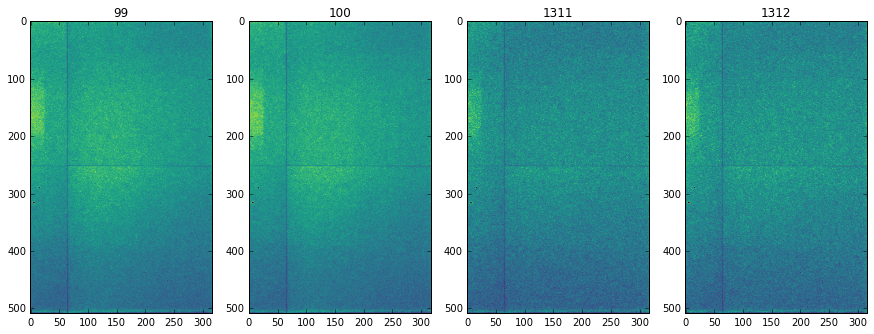

In [21]:
[height, width] = images[0].shape
    
# select Sample region
def plot_images_to_keep(file_index_start, file_index_end):
    """displays the first image excluded and kept, and the last image kept and excluded"""
    
    _data1_out = images[file_index_start - 1]
    _data1_in = images[file_index_start]
    
    _data2_in = images[file_index_end]
    _data2_out = images[file_index_end + 1]

    fig3 = plt.figure(figsize=(15, 50))

    ax_img1_out = plt.subplot(141)
    ax_img1_out.imshow(_data1_out, cmap='viridis')
    ax_img1_out.set_title("%d" %(file_index_start - 1))
    #ax_img1_out.set_title("Last image excluded: %s" %list_fname[file_index_start - 1])

    ax_img1_in = plt.subplot(142)
    ax_img1_in.imshow(_data1_in, cmap='viridis')
    ax_img1_in.set_title("%d" %(file_index_start))
    #ax_img1_in.set_title(list_fname[file_index_start - 1])

    ax_img2_in = plt.subplot(143)
    ax_img2_in.imshow(_data2_in, cmap='viridis')
    ax_img2_in.set_title("%d" %(file_index_end))
    #ax_img2_out.set_title("Last image excluded: %s" %list_fname[file_index_end])

    ax_img2_out = plt.subplot(144)
    ax_img2_out.imshow(_data2_out, cmap='viridis')
    ax_img2_out.set_title("%d" %(file_index_end + 1))
    #ax_img2_in.set_title(list_fname[file_index_end + 1])

    return [file_index_start, file_index_end]
    
file_range = interact(plot_images_to_keep,
               file_index_start = widgets.IntSlider(min=0, max=nbr_images, step=1, value=100, description='First Image to Keep'),
               file_index_end = widgets.IntSlider(min=0, max=nbr_images, step=1, value=1311, description='First Image to Keep'))


In [22]:
[file_index_start, file_index_end] = file_range.widget.result

In [25]:
print("Before, we had %d" %len(images))
new_images = images[file_index_start: file_index_end]
new_ob_mean = ob_average_counts[file_index_start: file_index_end]
print("After, we have %d" %len(new_images))

Before, we had 1485
After, we have 1211


#### 2. if we want to keep all the images

In [24]:
new_images = images
new_ob_mean = ob_average_counts

#### 2. Keep only the region of interest 

In [26]:
[s_left, s_right, s_top, s_bottom] = s_selection

In [27]:
new_images_cropped = []
for _image in new_images:
    _image_cropped = _image[s_top: s_bottom, s_left: s_right]
    new_images_cropped.append(_image_cropped)

In [28]:
print("number of images cropped: %d" %(len(new_images_cropped)))
print("Size of each image is (height, width):", (new_images_cropped[0].shape))

number of images cropped: 1211
Size of each image is (height, width): (448, 167)


### d. divide sample by OB average value

In [29]:
new_images_cropped_normalized = []
for _index, _image in enumerate(new_images_cropped):
    _mean_ob = new_ob_mean[_index]
    _image_normalized = _image / _mean_ob
    new_images_cropped_normalized.append(_image_normalized)

Check results !

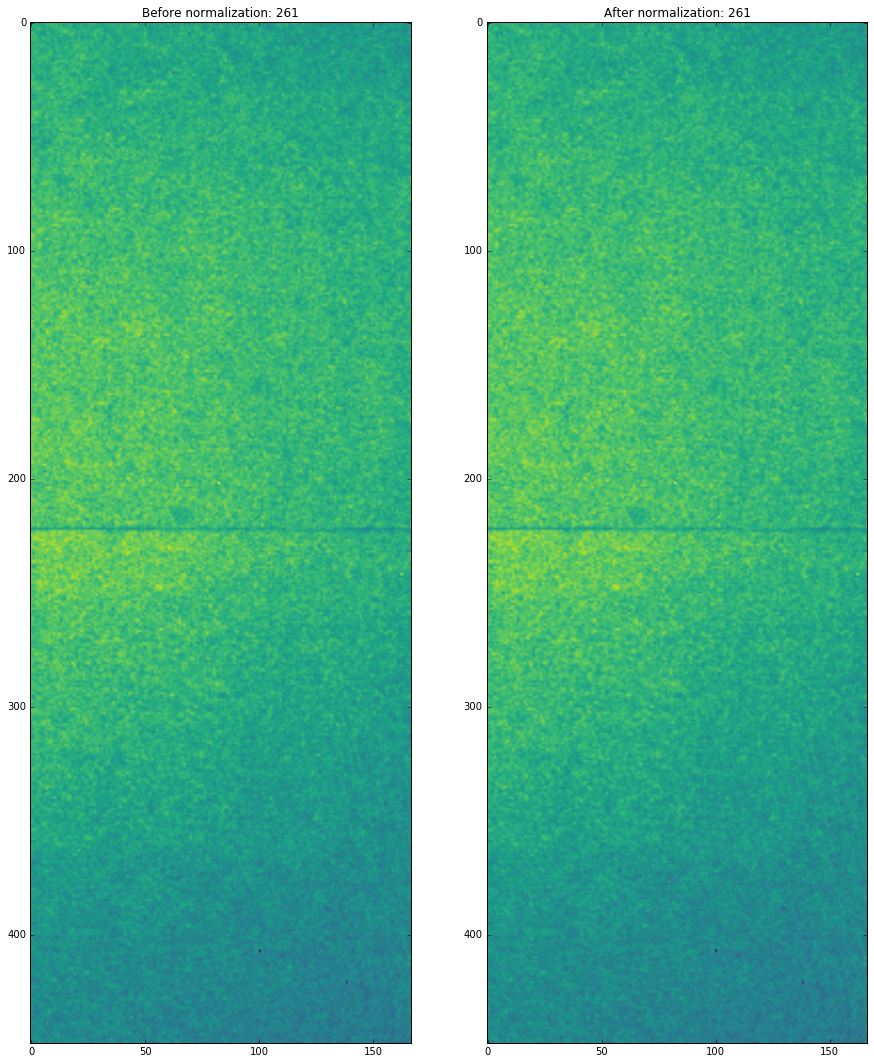

In [30]:
# select Sample region
nbr_images = len(new_images_cropped_normalized)

def plot_images_before_and_after_normalization(file_index):
    """Display the sample region before and after normalization"""
    
    _sample_raw = new_images_cropped[file_index]
    _sample_norm = new_images_cropped_normalized[file_index]

    fig4 = plt.figure(figsize=(15, 30))

    ax_img1 = plt.subplot(121)
    ax_img1.imshow(_sample_raw, cmap='viridis')
    ax_img1.set_title("Before normalization: %d" %(file_index))
    
    ax_img2 = plt.subplot(122)
    ax_img2.imshow(_sample_norm, cmap='viridis')
    ax_img2.set_title("After normalization: %d" %(file_index))
    
check_normalization = interact(plot_images_before_and_after_normalization,
                   file_index = widgets.IntSlider(min=0, max=nbr_images, step=1, value=0, 
                                              description='Image Index'))



## OB are in their own files 

NOT IMPLEMENTED YET !!

## Display Counts vs file index 

### 1. for each pixels

### 2. for binning of pixels defined 

In [ ]:
# how to bin the pixels
pixel_binning = 10 

Create 2D array of indices that will allow to quickly find the position of a pixel into the rebin array

    [0,0] [0,0] [0,1] [0,1] [0,2] ...
    [0,0] [0,0] [0,1] [0,1] [0,2] ...
    [1,0] [1,0] [1,1] [1,1] [1,2] ..
     ...

In [ ]:
[height, width] = new_images_cropped_normalized[0].shape

In [ ]:
print("width: %d" %width)
x_axis_bin = np.arange(0, width, pixel_binning)
print(x_axis_bin)

print("height: %d" %height)
y_axis_bin = np.arange(0, height, pixel_binning)
print(y_axis_bin)

Remove range of pixels that don't have a full bin

In [ ]:
_bin_new_images_cropped_normalized = []
for _image in new_images_cropped_normalized:
    _tmp_image = _image[0: y_axis_bin[-1], 0: x_axis_bin[-1]]
    _bin_new_images_cropped_normalized.append(_tmp_image)

In [ ]:
[bin_height, bin_width] = _bin_new_images_cropped_normalized[0].shape

Bin all images

In [ ]:
w = widgets.IntProgress()
w.max = len(_bin_new_images_cropped_normalized)
display(w)

_bin_images = np.empty(len(_bin_new_images_cropped_normalized), dtype=object)

_index = 0
for _image in _bin_new_images_cropped_normalized:

    _bin_image = np.zeros((len(y_axis_bin)-1, len(x_axis_bin)-1))
    for _x_index in range(len(x_axis_bin)-1):
        for _y_index in range(len(y_axis_bin)-1):
            _sub_array = _image[y_axis_bin[_y_index]:y_axis_bin[_y_index + 1], 
                                x_axis_bin[_x_index]:x_axis_bin[_x_index + 1]]
            
            _sub_array_mean = np.mean(_sub_array)
            _bin_image[_y_index, _x_index] = _sub_array_mean
            
    _bin_images[_index] = _bin_image
    _index += 1

    w.value = _index


In [ ]:
#To check that there is a difference between the images

In [ ]:
fig9 = plt.figure()
ax_img = plt.subplot()
cax = ax_img.imshow(_bin_images[5] - _bin_images[0], interpolation='nearest', cmap='viridis')
print(_bin_images[5].shape)
fig9.colorbar(cax)

#### check images binned

In [ ]:
# select Sample region
nbr_images = len(_bin_images)

def plot_images_binned(file_index):
    
    _image = _bin_images[file_index]

    fig8 = plt.figure()

    ax_img1 = plt.subplot(111)
    cax = ax_img1.imshow(_image, cmap='viridis', interpolation='nearest')
    ax_img1.set_title("File index: %d" %file_index)
    cmap = fig8.colorbar(cax)
    
check_normalization = interact(plot_images_binned,
                   file_index = widgets.IntSlider(min=0, max=nbr_images, step=1, value=0, 
                                              description='Image Index'))

In [ ]:
def plot_counts_binned(y_bin, x_bin):
    """Display the x_bin and y_bin counts over all the files"""
    
    _counts_bin = []
    for _image in _bin_images:
        _counts_bin.append(_image[y_bin, x_bin])
    
    fig5 = plt.figure()

    ax_img1 = plt.subplot(121)
    ax_img1.plot(_counts_bin)
    ax_img1.set_title("Counts vs File Index")
    ax_img1.set_xlabel("File Index")
    ax_img1.set_ylabel("Counts")
    
    ax_img2 = plt.subplot(122)
    cax = ax_img2.imshow(_bin_images[int(len(_bin_images)/2)], cmap='viridis', interpolation="nearest")
    ax_img2.axvline(x_bin, color='#aa0000', linewidth=2)
    ax_img2.axvline(x_bin+1, color='#aa0000', linewidth=2)
    ax_img2.axhline(y_bin, color='#0000aa', linewidth=2)
    ax_img2.axhline(y_bin+1, color='#0000aa', linewidth=2)
    ax_img2.set_xlabel("pixel")
    ax_img2.set_ylabel("pixel")
    fig5.colorbar(cax)
    
counts_binned = interact(plot_counts_binned,
                       y_bin = widgets.IntSlider(min=0, max=len(y_axis_bin), step=1, value=0, description='Y bin index'),
                        x_bin = widgets.IntSlider(min=0, max=len(x_axis_bin), step=1, value=0, description='X bin index'))


### 3. for entire image

In [39]:
nbr_images = len(new_images_cropped_normalized)

total_counts = []
for _image in new_images_cropped_normalized:
    _sum = _image.sum()
    total_counts.append(_sum)

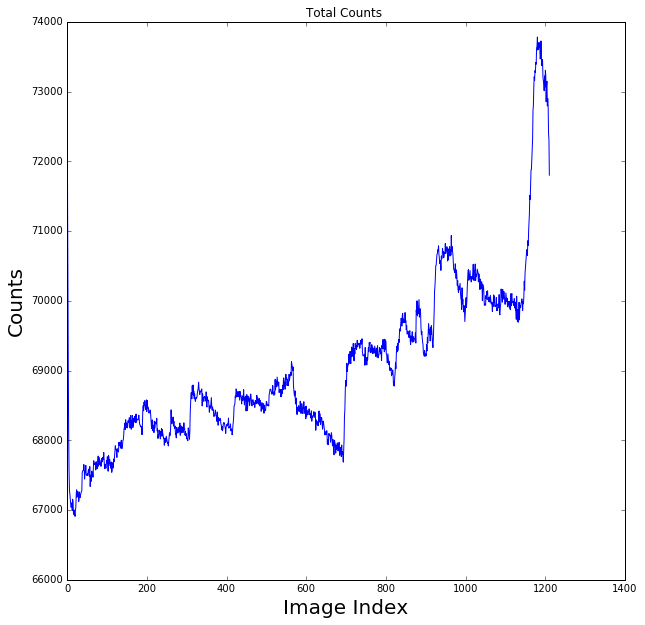

In [40]:
# display to check values
fig5 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(range(nbr_images), total_counts)

ax_img.set_xlabel("Image Index", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_title("Total Counts ")


### Select TOF file and define parameters required to calculate lambda equivalent spectra

In [31]:
import os
lambda_file = os.path.join(default_dir, 'lambda.txt')

#### Load the lambda created in [lambda conversion](create_lambda_array.ipynb)

In [32]:
import sys

In [33]:
sys.path.append('/users/j35/git/braggedge/python')

In [34]:
import neutronbraggedge
from neutronbraggedge.experiment_handler import *

In [35]:
_lambda_handler = LambdaWavelength(filename = lambda_file )

In [36]:
lambda_array = _lambda_handler.lambda_array
lambda_range = lambda_array[file_index_start: file_index_end]
print(len(lambda_range))
print(len(new_images_cropped_normalized))

1211
1211


### Counts vs Lambda

     1. for entire images

In [37]:
lambda_np = np.array(lambda_range)
lambda_angstroms = lambda_np * 1.e10

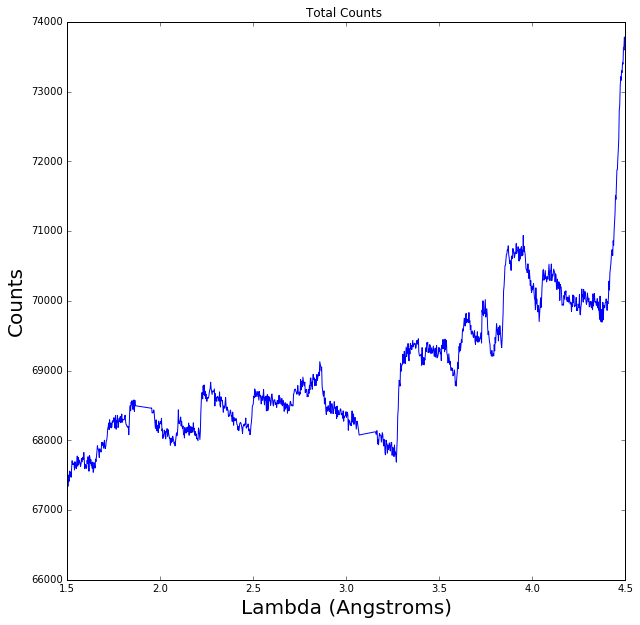

In [43]:
# display to check values
fig10 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(lambda_angstroms, total_counts)

ax_img.set_xlabel("Lambda (Angstroms)", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_xlim([1.5, 4.5])
#ax_img.set_ylim([1e5, 1.15e5])
ax_img.set_title("Total Counts ")

### Display using new Ducu's method   (TO BE DEFINED)

### Calculate  for the material, the set of 'hkl' and display them on each Counts vs lambda plots

In [44]:
from neutronbraggedge.braggedge import BraggEdge

In [45]:
_handler = BraggEdge(material='Si', number_of_bragg_edges=10, use_local_metadata_table=True)

/users/j35/git/braggedge/python/neutronbraggedge/config.cfg


In [46]:
_handler.hkl

[[1, 1, 1],
 [2, 0, 0],
 [2, 2, 0],
 [2, 2, 2],
 [3, 1, 1],
 [3, 3, 1],
 [3, 3, 3],
 [4, 0, 0],
 [4, 2, 0],
 [4, 2, 2]]

In [47]:
_handler.bragg_edges

[6.2718610519558977,
 5.4315910000000001,
 3.8407148287318207,
 3.1359305259779489,
 3.2753726112129593,
 2.4921848706994765,
 2.0906203506519656,
 2.7157955,
 2.4290813403952121,
 2.2174377402489043]

### display bragg edges calculated on top of Total_counts vs lambda

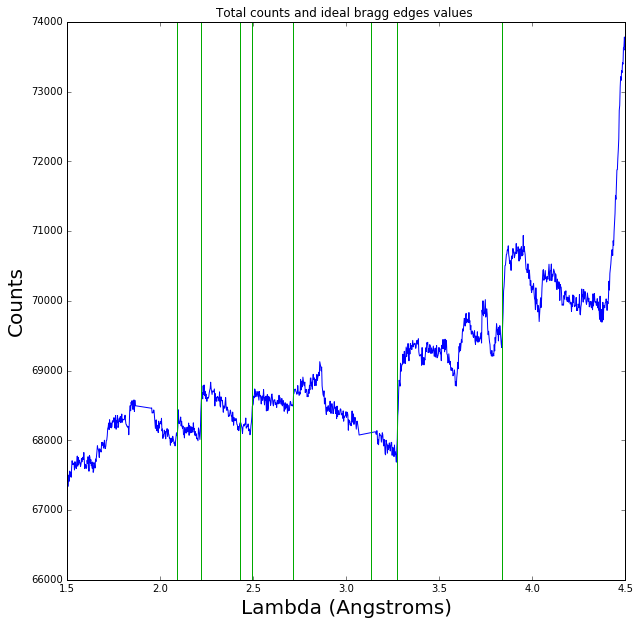

In [51]:
# display to check values
fig11 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(lambda_angstroms, total_counts)

ax_img.set_xlabel("Lambda (Angstroms)", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_xlim([1.5, 4.5])
#ax_img.set_ylim([1e5, 1.15e5])
ax_img.set_title("Total counts and ideal bragg edges values ")

for _value in _handler.bragg_edges:
    ax_img.axvline(_value, color="#00aa00", linewidth=1)


### Add labels of crystal orientation on top of plot 

In [62]:
_hkl_string = []
for _hkl in _handler.hkl:
    _hkl_s = ",".join(str(x) for x in _hkl)
    _hkl_string.append(_hkl_s)
print(_hkl_string)

['1,1,1', '2,0,0', '2,2,0', '2,2,2', '3,1,1', '3,3,1', '3,3,3', '4,0,0', '4,2,0', '4,2,2']


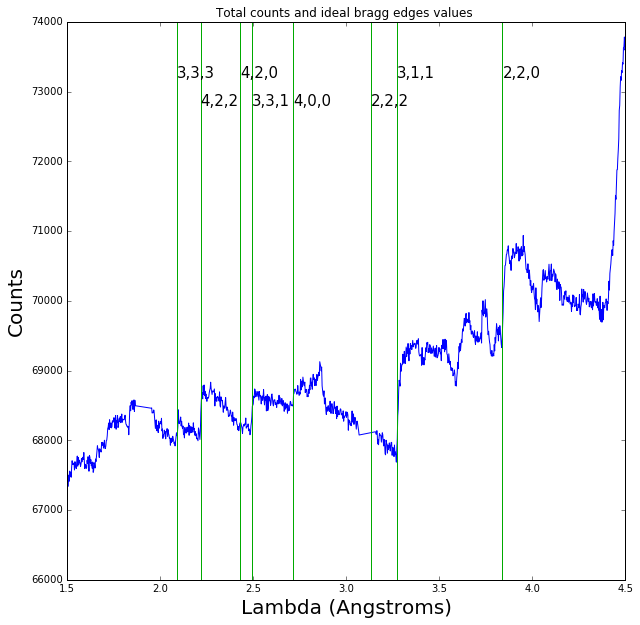

In [75]:
# display to check values
fig11 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(lambda_angstroms, total_counts)

min_x = 1.5
max_x = 4.5

ax_img.set_xlabel("Lambda (Angstroms)", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_xlim([min_x, max_x])
#ax_img.set_ylim([1e5, 1.15e5])
ax_img.set_title("Total counts and ideal bragg edges values ")

y_offset = 200
y_value = 73000
for _index, _value in enumerate(_handler.bragg_edges):
    if _value > max_x:
        continue
    ax_img.axvline(_value, color="#00aa00", linewidth=1)
    ax_img.text(_value, y_value + ((-1)**_index)*y_offset, _hkl_string[_index], fontsize=15)
    